In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os
import creep_event_picker as cep
import obspy
import cmcrameri.cm as cmc
import h5py
%matplotlib inline


In [8]:
def check_dir(path):
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist 
        os.makedirs(path, exist_ok=True)

Import creepmeter database

In [9]:
Creepmeter_dataframe = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv',index_col=0)
Creepmeter_dataframe

,Network,Creepmeter_abbrv,File_code,Start Time,End Time,"Sampling rate, Hz","Sampling rate, mins",Latitude,Longitude,Length,Depth,Obliquity,Creepmeter_full_name
0,EAF,BAL1,BAL1_1T,2023-03-12T10:47:55.000000Z,2023-09-05T13:14:55.000000Z,0.016667,1T,37.9903,38.1990,5 m,NaN,30.0,Balikburnu
1,PARK,C461,C461_10T,2004-09-29T02:20:00.000000Z,2022-06-20T12:40:00.000000Z,0.001667,10T,35.7240,-120.2820,NaN,NaN,30.0,Highway 46
2,PARK,C462,C462_1T,2021-08-19T19:10:11.000000Z,2024-03-22T01:05:11.000000Z,0.016667,1T,35.7240,-120.2820,NaN,NaN,30.0,Highway 46
3,UTA,CAN1,CAN1_30T,2012-06-12T15:33:00.000000Z,2017-06-15T08:33:00.000000Z,0.000556,30T,38.0198,-110.0374,7.5 m,NaN,45.0,Canyonlands
4,NAF,CER1,CER1_30S,2019-10-09T06:46:00.000000Z,2024-05-23T10:25:30.000000Z,0.033333,30S,40.8947,32.7773,20 m,NaN,29.0,Cerkes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,HOL,XSJ3,XSJ3_10T,2007-02-15T20:19:59.000000Z,2016-12-08T18:09:59.000000Z,0.001667,10T,36.8360,-121.5210,20 m,NaN,30.0,San Juan Bautista #3
125,PARK,XTA1,XTA1_10T,1985-12-18T00:00:00.000000Z,2024-10-09T18:50:00.000000Z,0.001667,10T,35.8900,-120.4270,30 m,1 m,30.0,Taylor Ranch
126,PARK,XVA1,XVA1_10T,1987-05-29T00:00:00.000000Z,2017-10-23T22:10:00.000000Z,0.001667,10T,35.9220,-120.4620,30 m,1 m,30.0,Varian
127,EAF,YZE1,YZE1_1T,2023-09-07T10:36:07.000000Z,2024-05-26T12:59:07.000000Z,0.016667,1T,38.1791,38.7526,20 m,NaN,30.0,Yazica East


In [14]:
frequency_dict = {
        1/60: '1S',    # 1 second
        1/6: '10S',  # 10 seconds
        1/2: '30S',  # 30 seconds
        1: '1T',  # 1 minute
        2: '2T',  # 2 minutes
        5: '5T',  # 5 minutes
        10: '10T',# 10 minutes
        15: '15T', # 15 minutes
        30: '30T',# 30 minutes
        60: '60T'    # 60 minutes
    }

In [10]:
cutter = 2
n=10
cmap = cmc.roma #select the colormap

slicedCM = cmap(np.linspace(0, 1, cutter+1)) #list of colors that make up the colormap, can be called by using slicedCM[j] where j is the loop number in the fore loop

In [11]:
df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_18_APR_2025.csv",index_col=0)
df_all

,Network,Creepmeter_full_name,Creepmeter_abbrv,Latitude,Longitude,"Sampling rate, mins",Event_id,ST,ET,"Displacement, mm","Duration, hrs",File_code
0,HOL,Melendy Ranch,XMR1,36.5950,-121.1870,10T,0000_XMR1,1980-02-19 15:20:00,1980-02-20 21:20:00,0.163750,30.000000,XMR1_10T
1,HOL,Melendy Ranch,XMR1,36.5950,-121.1870,10T,0001_XMR1,1980-02-21 06:20:00,1980-02-28 15:20:00,0.567109,177.000000,XMR1_10T
2,HOL,Melendy Ranch,XMR1,36.5950,-121.1870,10T,0002_XMR1,1980-07-22 17:40:00,1980-08-04 08:50:00,0.761968,303.166667,XMR1_10T
3,HOL,Melendy Ranch,XMR1,36.5950,-121.1870,10T,0003_XMR1,1980-09-10 10:10:00,1980-09-16 22:50:00,0.441859,156.666667,XMR1_10T
4,HOL,Melendy Ranch,XMR1,36.5950,-121.1870,10T,0004_XMR1,1980-12-13 12:20:00,1980-12-13 20:50:00,0.127001,8.500000,XMR1_10T
...,...,...,...,...,...,...,...,...,...,...,...,...
6292,HAY,Fremont Winery,CFW1,37.5320,-121.9520,1T,6292_CFW1,2024-02-03 17:03:00,2024-02-04 04:34:00,0.021122,11.516667,CFW1_1T
6293,HAY,Fremont Winery,CFW1,37.5320,-121.9520,1T,6293_CFW1,2024-02-04 09:44:00,2024-02-05 14:04:00,0.088898,28.333333,CFW1_1T
6294,HOL,Fox Creek,FCR1,36.6925,-121.3061,1T,6294_FCR1,2024-02-12 15:16:00,2024-02-15 21:57:00,0.084820,78.683333,FCR1_1T
6295,HOL,Fox Creek,FCR1,36.6925,-121.3061,1T,6295_FCR1,2024-02-16 06:05:00,2024-02-16 08:26:00,0.260918,2.350000,FCR1_1T


In [12]:
df_all['ST'] = pd.to_datetime(df_all['ST'])
df_all.drop(df_all[df_all['ST']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.02].index,inplace=True)
print(len(df_all))


columns = df_all.columns.tolist()
columns.append('Quality_check_final')


df_new_qc = pd.DataFrame(columns=columns)
df_new_qc

6048


,Network,Creepmeter_full_name,Creepmeter_abbrv,Latitude,Longitude,"Sampling rate, mins",Event_id,ST,ET,"Displacement, mm","Duration, hrs",File_code,Quality_check_final


gathering info for BAL1_1T
../../Data/DATA_tidied/SAC/BAL1_1T.SAC
reading & processing SAC data
Identifying events
beginning QC for BAL1_1T


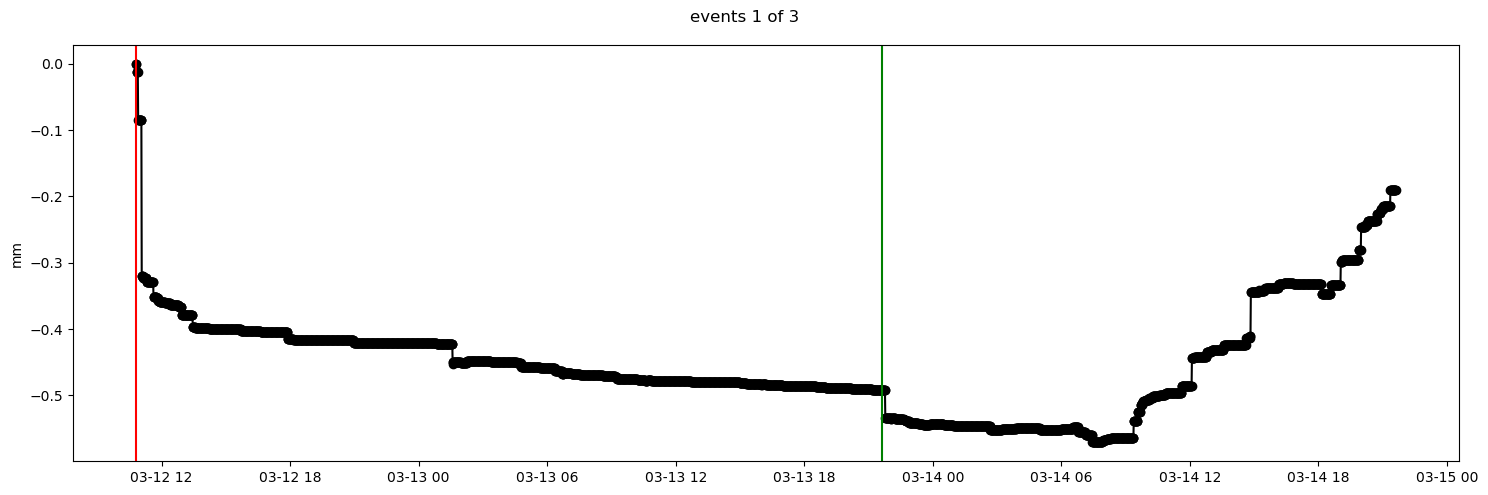

1/3
This event is not a creep event


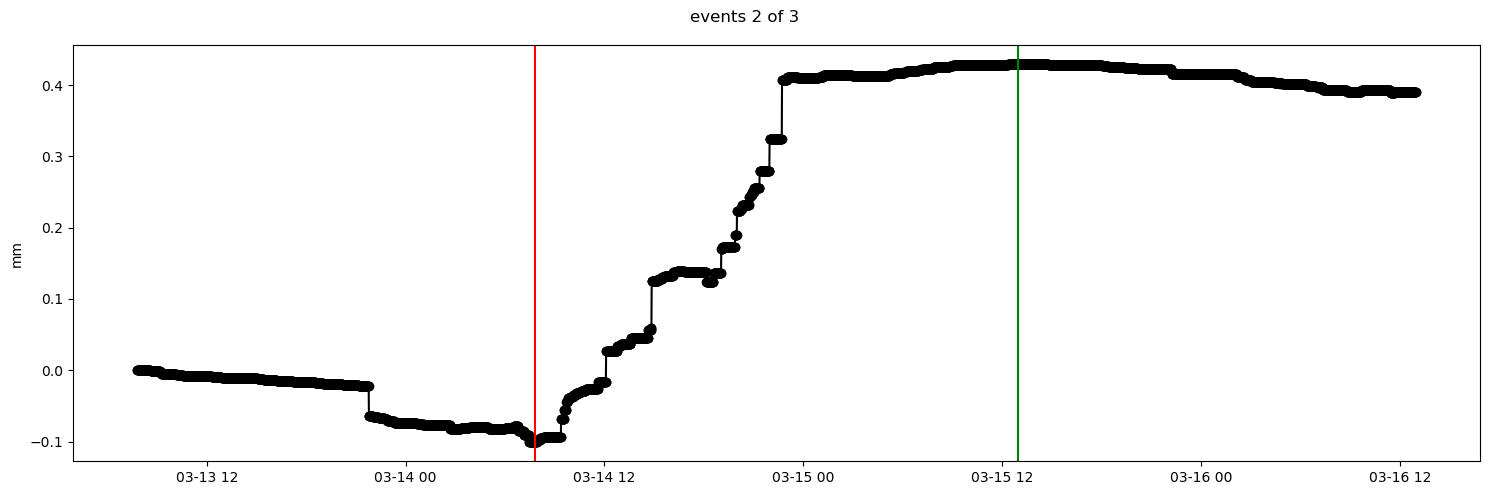

2/3
Creep event identified


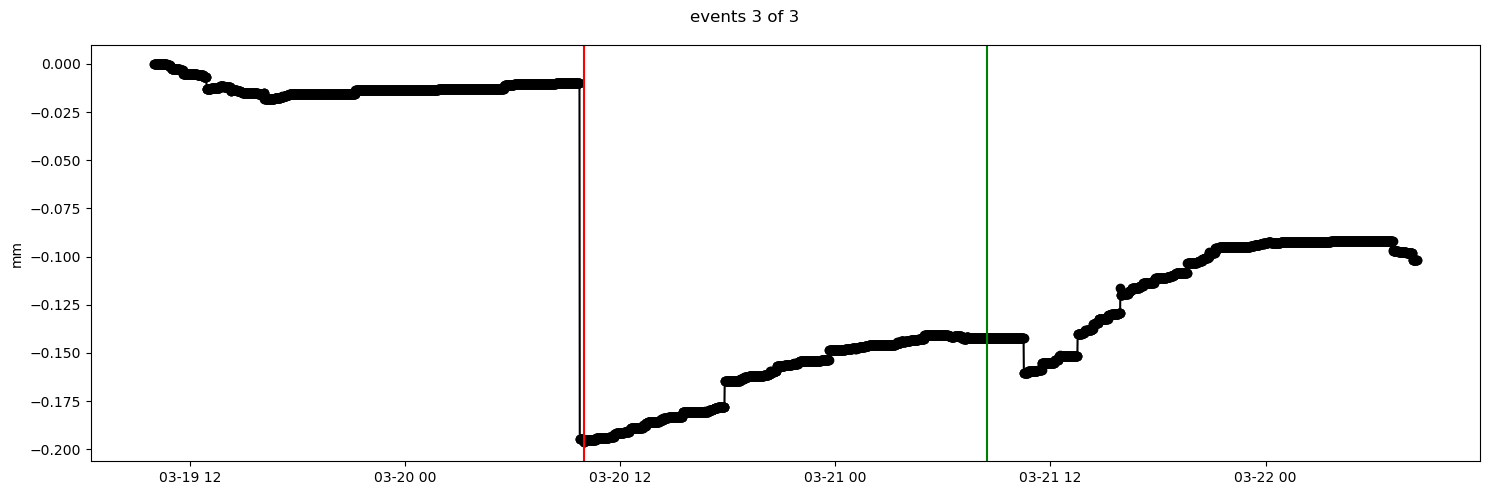

3/3
Creep event identified
                    ST                   ET               ET_new  \
0  2023-03-12 10:47:00  2023-03-13 18:56:00  2023-03-13 21:37:00   
1  2023-03-14 09:22:00  2023-03-15 08:15:00  2023-03-15 12:59:00   
2  2023-03-20 10:00:00  2023-03-21 08:26:00  2023-03-21 08:26:00   

                ST_new Quality_check_new Quality_check_final  
0  2023-03-12 10:47:00                CE                 NCE  
1  2023-03-14 07:47:00                CE                  CE  
2  2023-03-20 10:00:00                CE                  CE  
QC completed
gathering info for C461_10T
../../Data/DATA_tidied/SAC/C461_10T.SAC
reading & processing SAC data
Identifying events
beginning QC for C461_10T


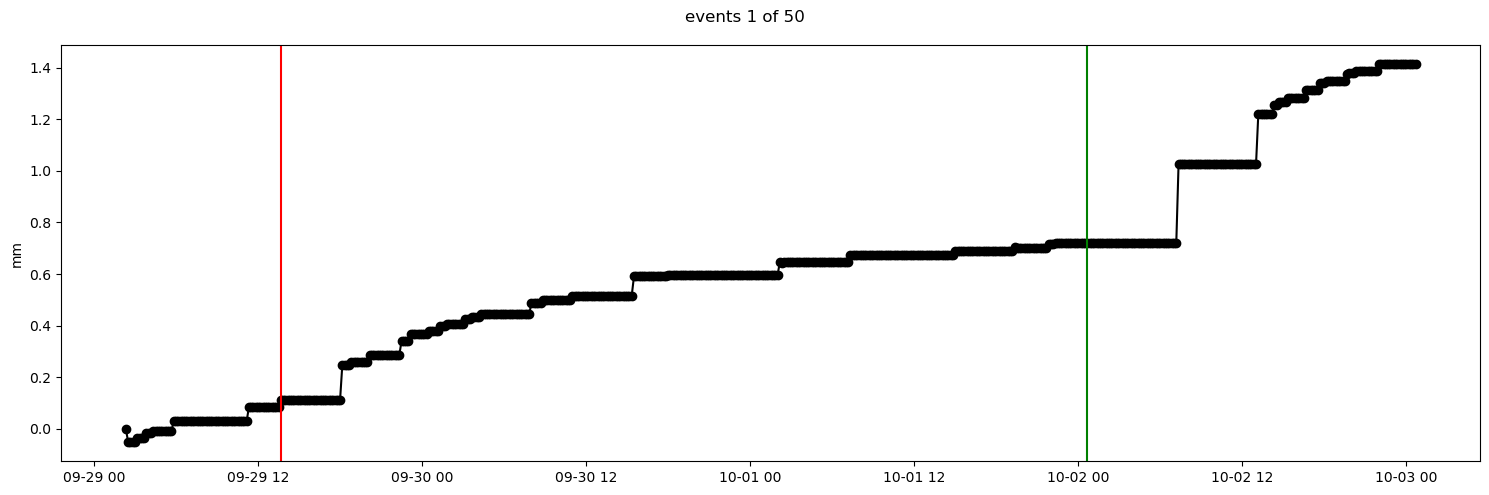

1/50
Creep event identified


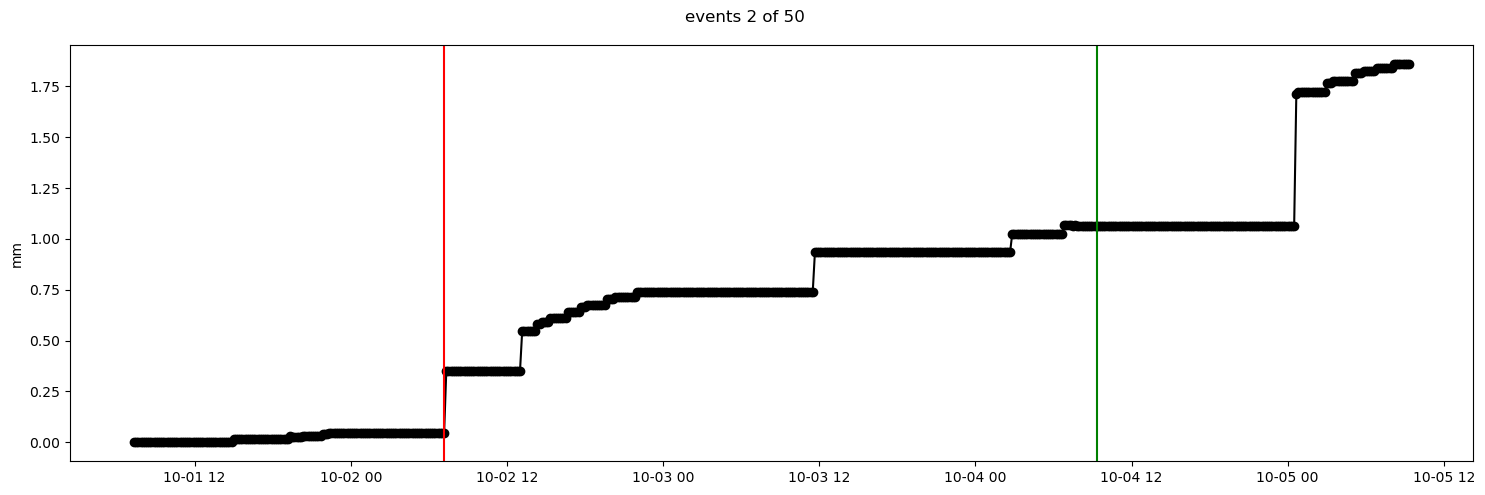

2/50
Creep event identified


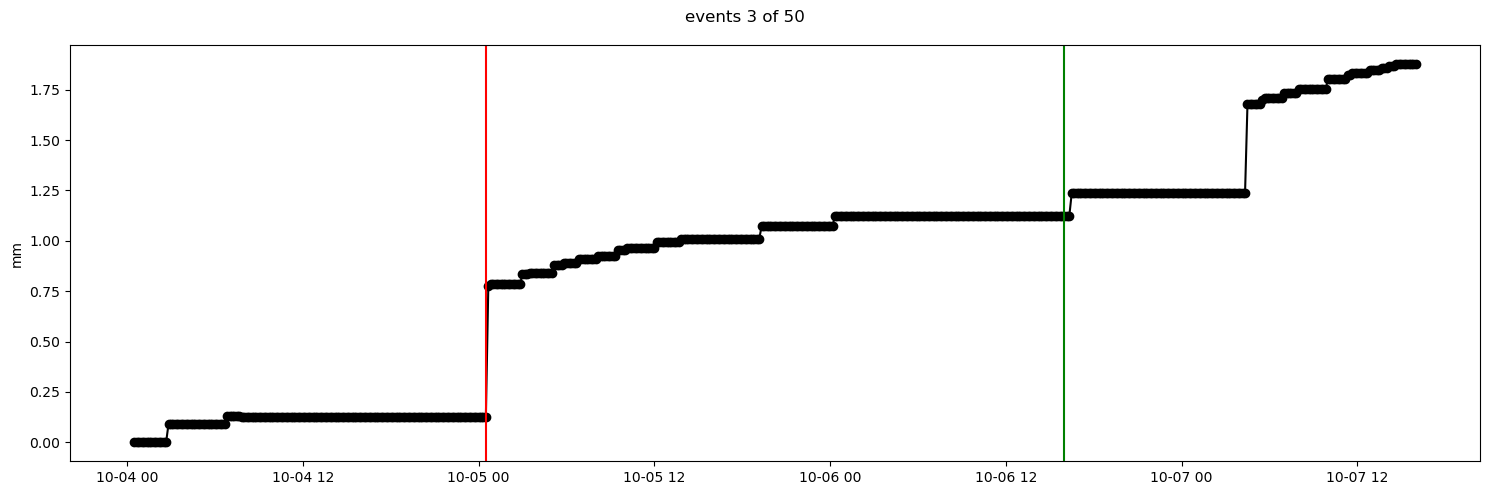

3/50
Creep event identified


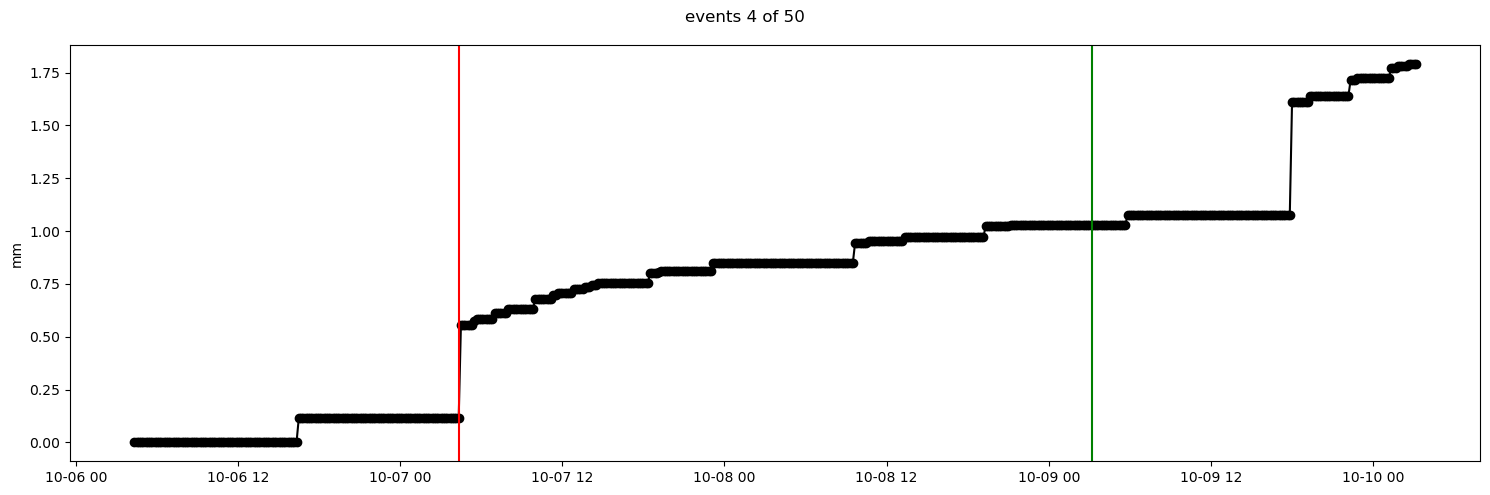

4/50
Creep event identified


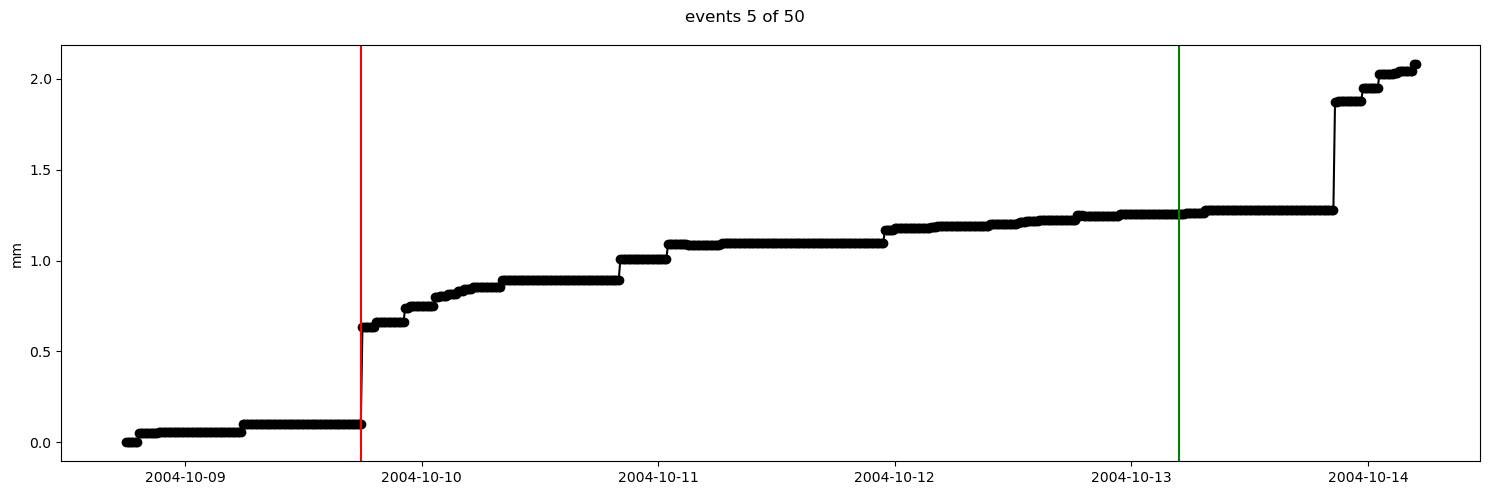

5/50
Creep event identified


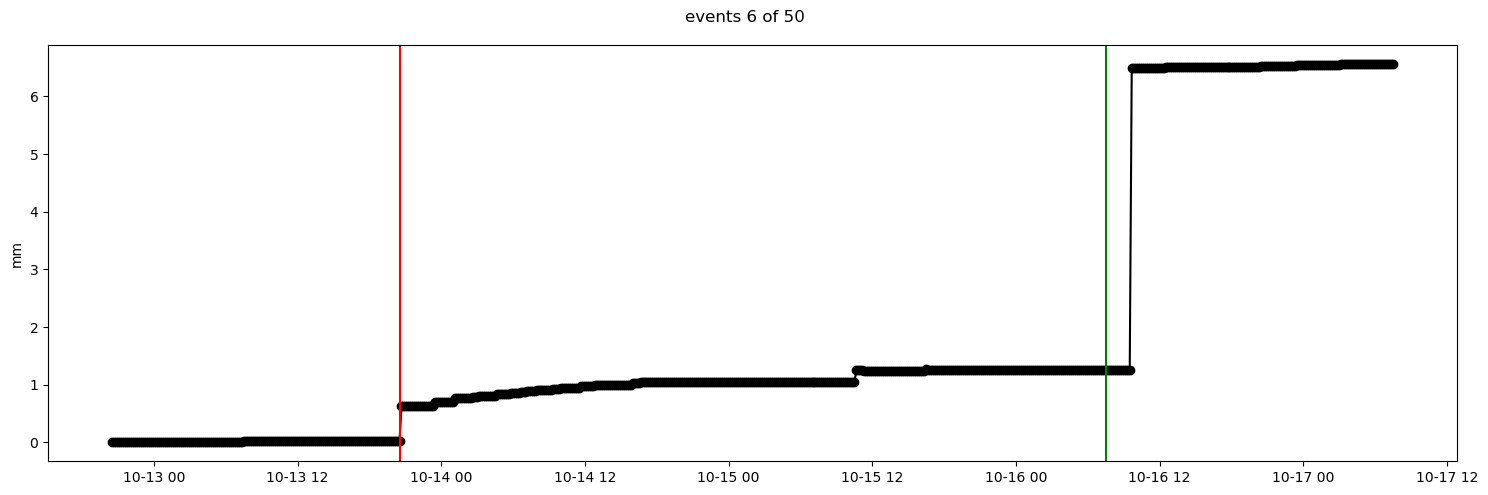

6/50
Creep event identified


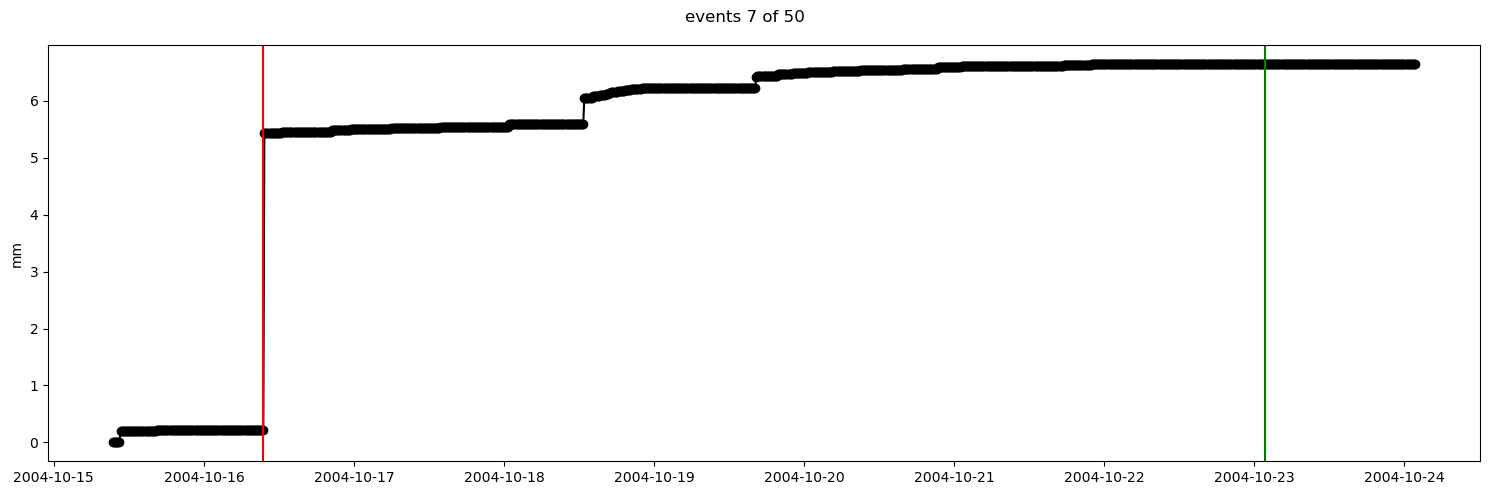

7/50
This event is not a creep event


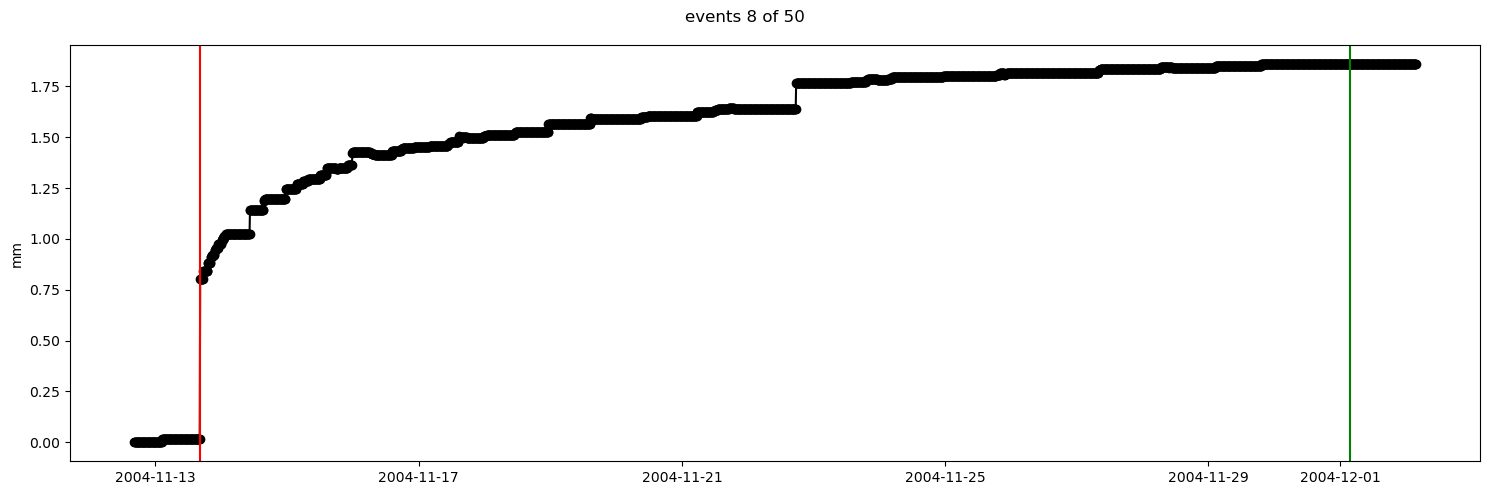

8/50
Creep event identified


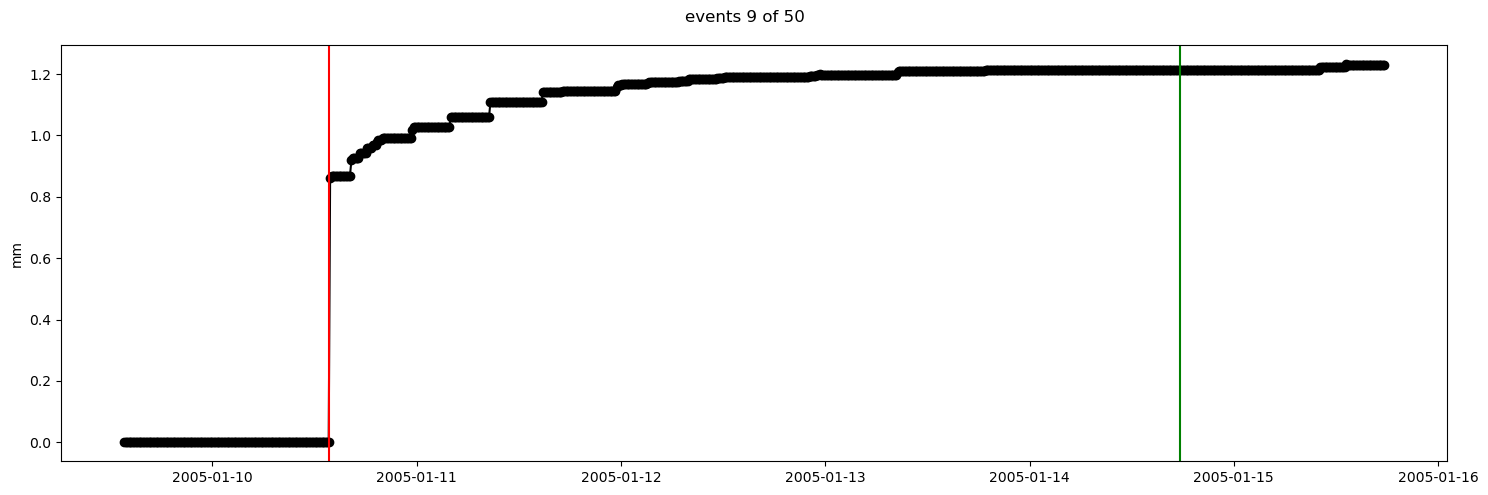

9/50
Creep event identified


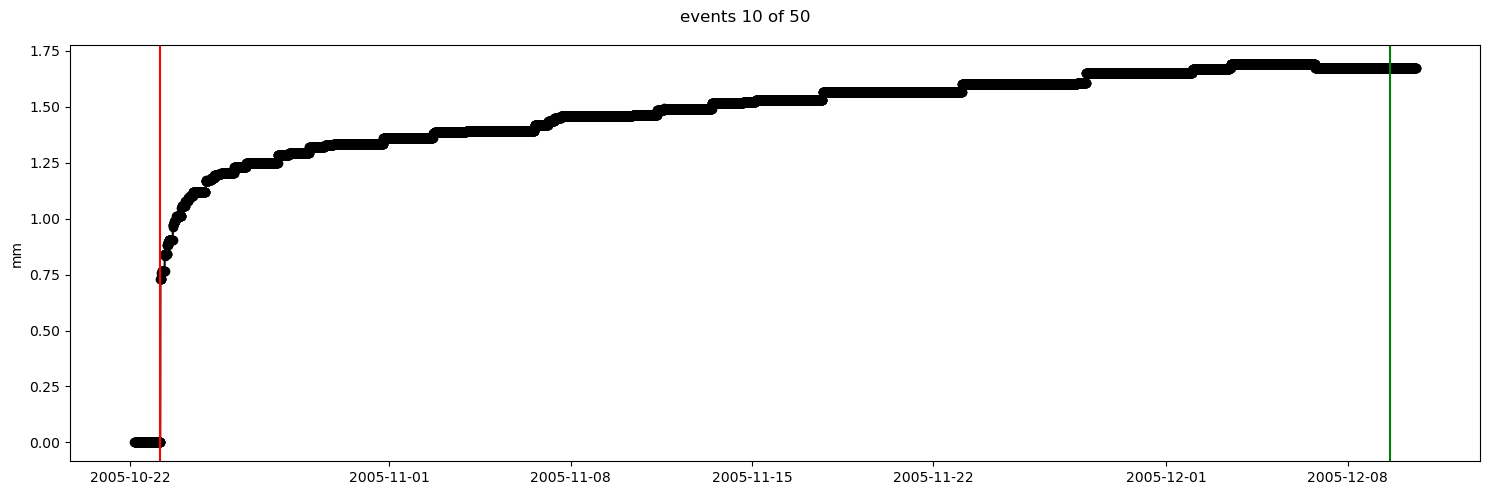

10/50
Creep event identified


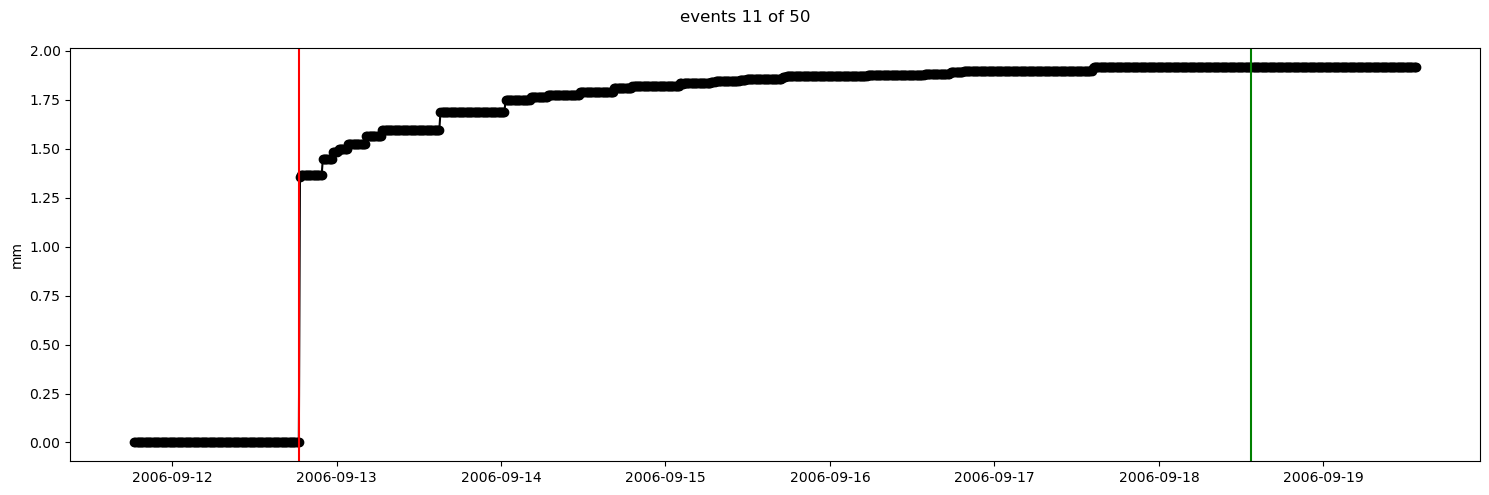

11/50
Creep event identified


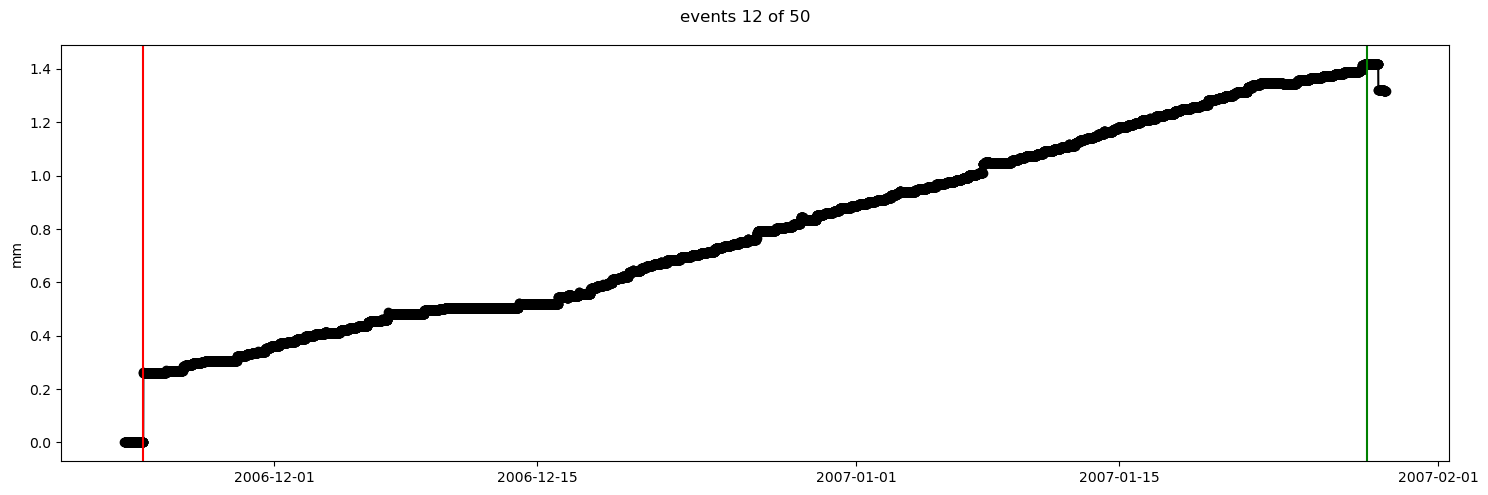

12/50
This event is not a creep event


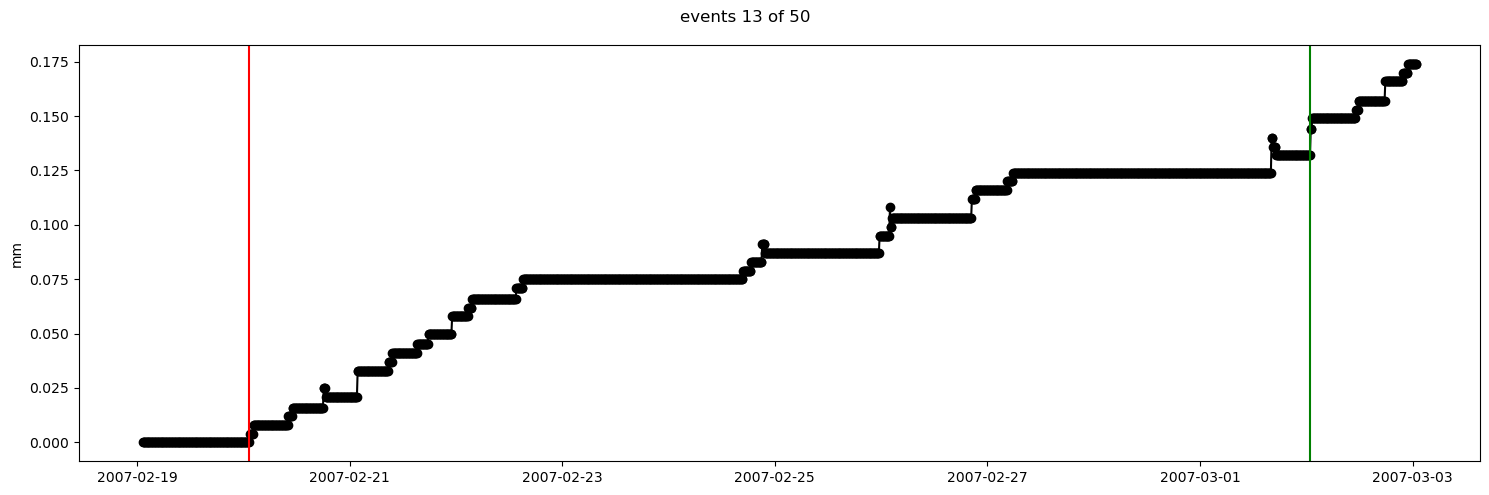

13/50
Creep event identified


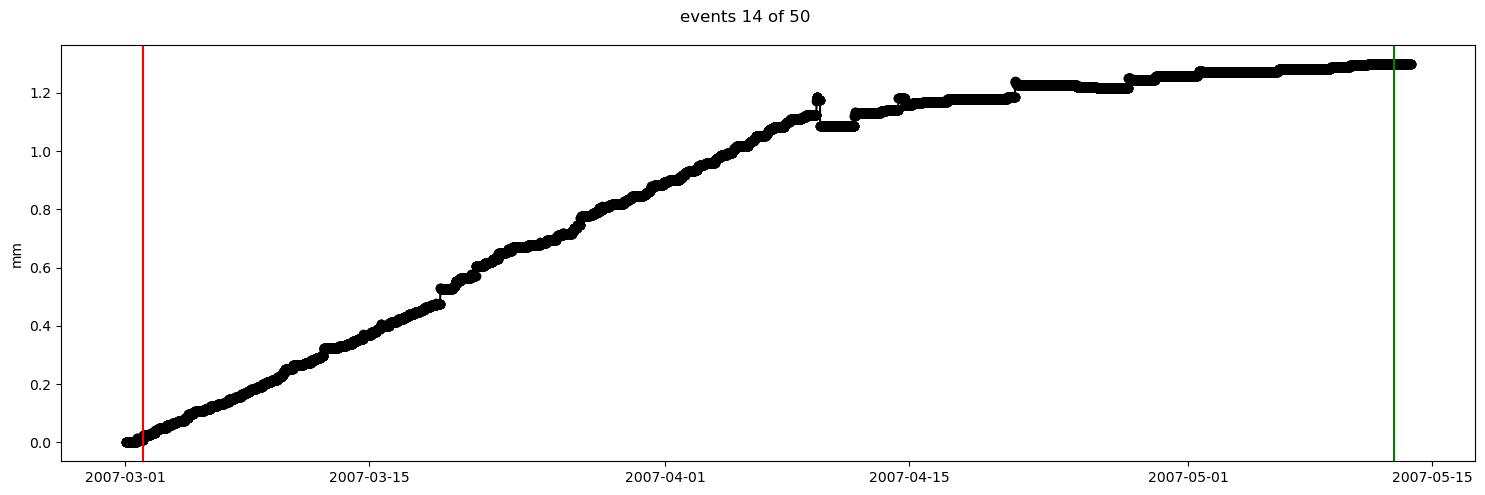

14/50
Creep event identified


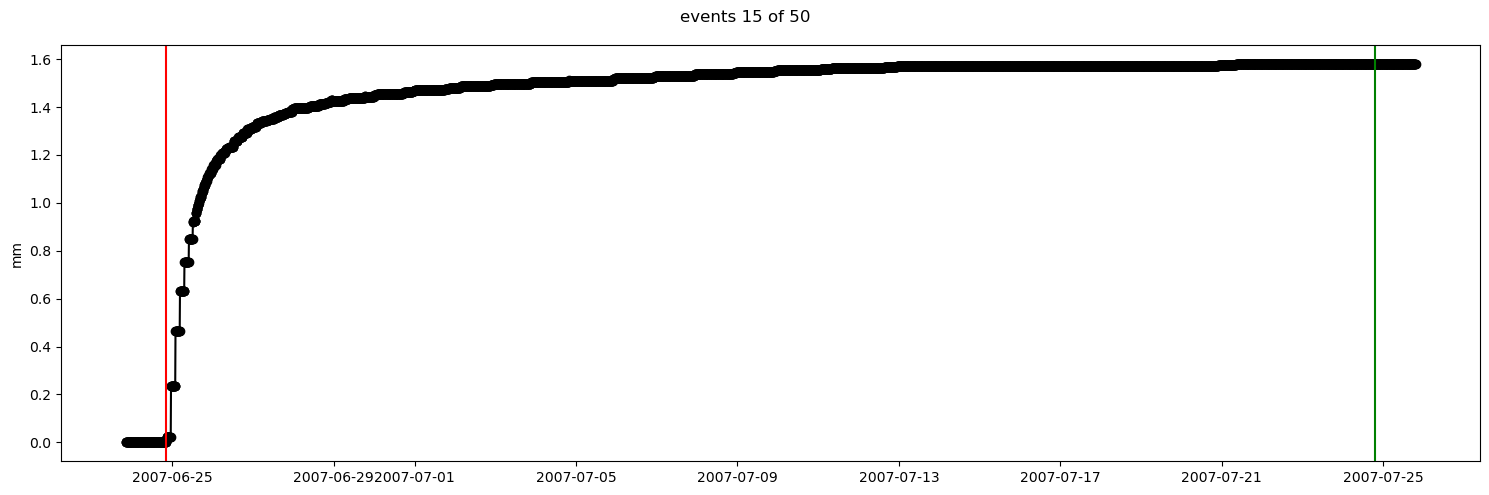

15/50
Creep event identified


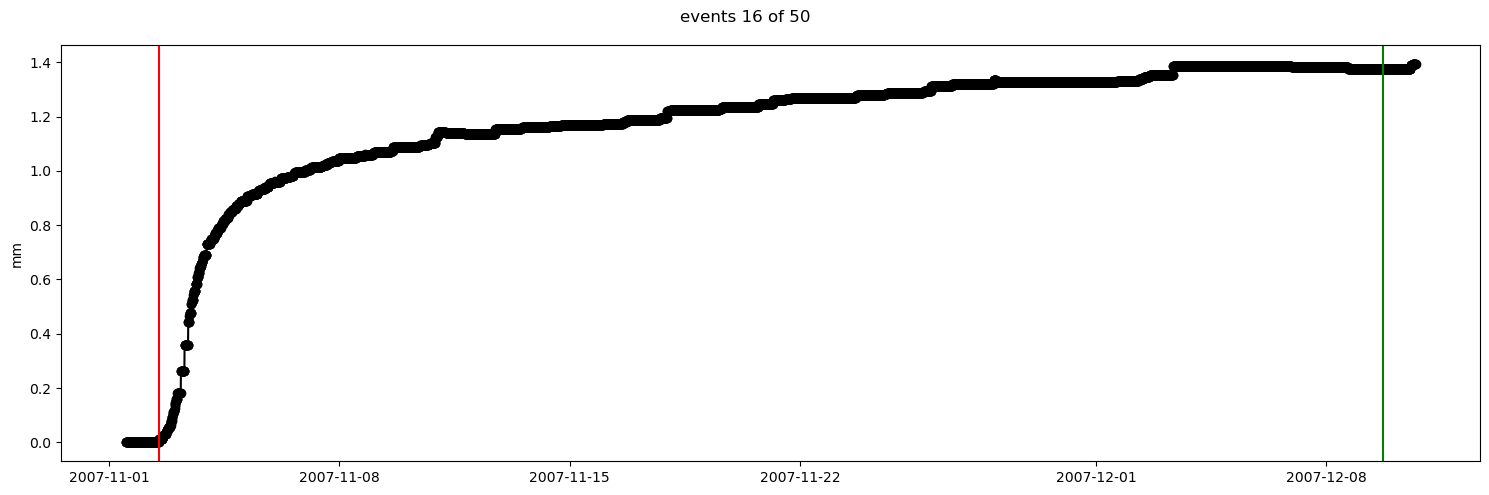

16/50
Creep event identified


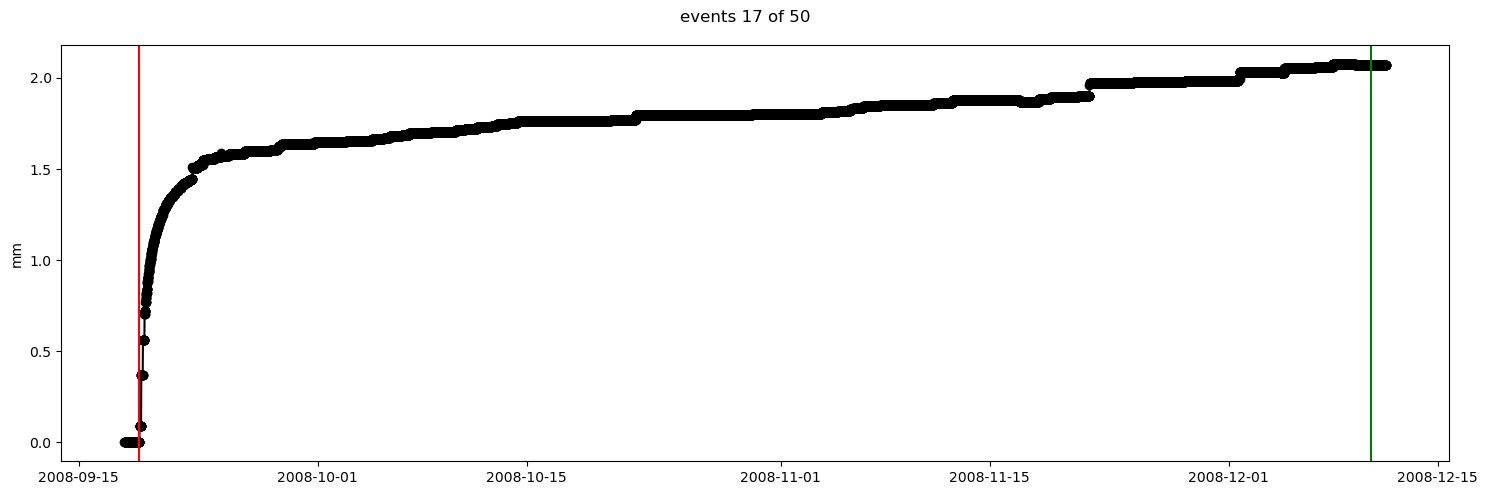

17/50


KeyboardInterrupt: Interrupted by user

In [ ]:
plt.close('all')
for i in range(len(Creepmeter_dataframe)):
    print('gathering info for {k}'.format(k=Creepmeter_dataframe.File_code.iloc[i]))
    network = Creepmeter_dataframe.Network.iloc[i]
    file_code = Creepmeter_dataframe.File_code.iloc[i]
    df_picks = pd.read_csv("../../Data/DATA_tidied/Picks/{q}_picks.csv".format(q =file_code),index_col=0)
    if 'Quality_check_final' in df_picks.columns:
        print("Alread Qc'ed")
    else:
        path = "../../Data/DATA_tidied/SAC/{q}.SAC".format(q = file_code)
        path_save = "../../Data/DATA_tidied/Picks/".format()
        check_dir(path_save)
        print(path)

        print('reading & processing SAC data')

        '''st = obspy.read(path)
        tr = st[0]
        tr.interpolate(sampling_rate=tr.stats.sampling_rate)
        tm = tr.times("utcdatetime")
        creep = tr.data
        sample_rate =  round(tr.stats.delta)/60
        tm_dt = []
        for w in range(len(tm)):
            tm_new = tm[w].datetime
            tm_dt.append(tm_new)
        tm_int, creep_int, upsampled = cep.interpolate(tm_dt,creep,sample_rate)'''

        with h5py.File('../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=Creepmeter_dataframe['Creepmeter_abbrv']), 'r') as f:
            # Loop through each key in the file
            keys = list(f.keys())
            
            for key in f.keys():
                if key not in ['Temperature','Temperature_1T','Temperature_5T','Daily_measurements','Manual_measurements','Orthogonal']:
                    print("Key:", key)
                    data = f[key]  # Access the dataset
                    data_keys = list(data.keys())
                    print(data_keys)
                    slip = data[data_keys[0]][:]
                    time =  data[data_keys[1]][:]
                    decoded_time = [byte_str.decode('utf-8') for byte_str in time]
                    decoded_time = pd.to_datetime(decoded_time)

                    smpl_rate = data.attrs['sampling_rate']   
                    time_units = data.attrs['time_units']     
                    slip_units = data.attrs['slip_units']  
                    channel = data.attrs['channel'] 
                    starttime = data.attrs['starttime'] 
                    delta = data.attrs['delta']
                    freq_chosen = frequency_dict[smpl_rate]
                    upsampled = interpolate(decoded_time,slip,freq_chosen)
        
        print('Identifying events')
        df_picks.drop(df_picks[df_picks['Quality_check_new'] != 'CE'].index,inplace=True)
        #df_picks = df_all[df_all['File_code']==file_code]
        #df_picks.reset_index(inplace=True,drop=True)      
        df_end=df_picks['ET_new']
        df_start=df_picks['ST_new']

        print('beginning QC for {k}'.format(k=file_code))
        QC = []
        for p in range(len(df_picks)):
            start = df_start.iloc[p]
            end = df_end.iloc[p]
            fig = plt.figure(figsize=(15,5))
            ax = plt.subplot(1,1,1)

            fig.suptitle('events {a} of {c}'.format(a = p+1,c =len(df_picks) ))
            boolarr_selecta = np.logical_and(np.array(tm_int)>=pd.to_datetime(start).replace(tzinfo=None)
                                            -dt.timedelta(hours=24),np.array(tm_int)<=pd.to_datetime(end).replace(tzinfo=None)
                                            +dt.timedelta(hours = 24))
            tm_selecta = tm_int[boolarr_selecta]


            creep_selecta = creep_int[boolarr_selecta]
            creep_selecta = creep_selecta - creep_selecta[0]
            plt.plot(tm_selecta,creep_selecta,color='black',marker='o',markersize=6)
            left,right = ax.get_xlim()
            top,bottom = ax.get_ylim()
            plt.ylim(top,bottom)
            plt.xlim(left,right)
            

            plt.vlines([start,end],ymin=bottom,ymax=top,colors=['red','green'])
            #plt.hlines([0,0.02],xmin=left,xmax=right,colors=['k','red'])
            plt.ylabel('mm')
        
            fig.tight_layout()
            plt.show()
            ##### QC ####
            print('{m}/{n}'.format(m=p+1,n=len(df_picks)))         
                
            while True:
                user_input = input("Is this event a creep event? (y/n): ").strip().lower()

                if user_input == 'y':
                    QC.append('CE')
                    print("Creep event identified")
                    # Do something for "yes"
                    break
                elif user_input == 'n':
                    QC.append('NCE')
                    print("This event is not a creep event")
                    # Do something for "esc" or just exit
                    break
                else:
                    print("Invalid input! Please enter 'y' to proceed or 'n' to exit.")
            
        

            plt.close() 

        
        df_picks['Quality_check_final'] = QC
        print(df_picks)
        print('QC completed')
        df_picks.to_csv("../../Data/DATA_tidied/Picks/{q}_picks.csv".format(q =file_code))
            #df_new_qc = pd.concat([df_new_qc,df_picks],ignore_index=True)
            #df_new_qc.drop(df_new_qc[df_new_qc['Quality_check_final']!='CE'].index,inplace=True)
            #df_new_qc.to_csv('../../Data/DATA_tidied/QCed_creep_event_catalogue_18_APR_2025.csv')

In [ ]:
start

In [ ]:
min_length = delta*6/60/60

In [ ]:
df_new_qc

In [27]:
import h5py
import re

In [ ]:
with h5py.File('../../Data/DATA_tidied/HDF5/{k}.h5'.format(k=Creepmeter_dataframe['Creepmeter_abbrv'].iloc[4]), 'r') as f:
            # Loop through each key in the file
            keys = list(f.keys())
            for key in f.keys():
                if key not in ['Temperature','Temperature_1T','Temperature_5T','Daily_measurements','Manual_measurements','Orthogonal']:
                    print("Key:", key)
                    match = re.search(r'_(\d*\.?\d+)mins$', key)
                    if match:
                        freq_value = float(match.group(1))
                        new_suffix = frequency_dict.get(freq_value)
                        if new_suffix:
                            new_key = re.sub(r'_\d*\.?\d+mins$', f'_{new_suffix}', key)
                        else:
                            new_key = key  # or raise an error / warning
                    else:
                        new_key = key  # unchanged if pattern not matched

                    print(new_key)

Key: CER1_0.5mins
CER1_30S
Key: CER1_1.0mins
CER1_1T
